In [1]:
from grover_num_list_cirq import find_num, find_num_list
from qiskit.tools.visualization import plot_histogram, plot_coupling_map
from backend_operation import run_simulator, get_transpiled_circuits_of_circuit, get_fake_backend_list,get_unitary, get_fake_backend, get_fake_backend_list

In [12]:
import random
import timeit
import matplotlib.colors as mcolors

In [11]:
from itertools import combinations, permutations

In [2]:
block_diagram = False
qc_size = 4

In [3]:
fake_backed_name = 'FakeAuckland' #random.sample(get_fake_backend_list(min_qubit=len(experiments[0].qubits), max_qubit=len(experiments[0].qubits) + 10),1)[0][0]

In [14]:
num_qubits = 3
num_list = list(range(2**num_qubits))
final_expermient = []
for winner in num_list:
    grover_num = find_num()
    grover_num.build_iteration([winner],circuit_nqubits=num_qubits, block_diagram=block_diagram)
    grover_num.create_grover(solutions = 1, block_diagram=block_diagram)
    final_expermient.append(grover_num.measure_qc[0])

In [21]:
transpiled_circuit = [
    get_transpiled_circuits_of_circuit(qc, ['Aer', fake_backed_name], 
                                                    [None] + list(permutations(range(num_qubits))),
                                                    optimization_level_list=[0,3])
    for qc in final_expermient
]


In [22]:
result_for_circuiut = [
    [
        run_simulator(qc,shots = 1024 * 4)
        for qc in qc_value
    ]
    for qc_value in transpiled_circuit
]

In [105]:
output = []
for value, circuits in enumerate(result_for_circuiut):
    for index, run_circuit in enumerate(circuits): 
        result_dict= run_circuit.to_dict()
        cirq_result = result_dict['results'][0]
        cirq_counts = cirq_result['data']['counts']
        cirq_time = cirq_result['time_taken']
        cirq_name = cirq_result['header']['name']
        cirq_depth = transpiled_circuit[value][index].depth()
        output.append({'value' : value, 'name' : cirq_name, 'time_taken' :cirq_time, 'depth':cirq_depth, 'count':cirq_counts})

In [130]:
data = {
    'Value' : [],
    'Backend' : [],
    'Qubit_Position' : [],
    'Optimization_level' : [],
    'Depth' : [],
    'Time_Taken' : [],
    'Counts' : []
}

In [133]:
for cur_data in output:
    data['Value'].append(cur_data['value'])
    data['Backend'].append(cur_data['name'].split('|')[0].replace(" ",""))
    data['Qubit_Position'].append(cur_data['name'].split('|')[1].replace(" ",""))
    data['Optimization_level'].append(cur_data['name'].split('|')[2].replace(" ",""))
    data['Depth'].append(cur_data['depth'])
    data['Time_Taken'].append(cur_data['time_taken'])
    data['Counts'].append([cur_data['count'][f'0x{index}'] for index in range(len(cur_data['count']))])

In [135]:
for cur_data in output:
    data['Value'].append(cur_data['value'])  # Assuming value is stored at index 0 in each sublist
    backend, qubit_position, optimization_level = cur_data['name'].split('|')
    data['Backend'].append(backend.strip())
    data['Qubit_Position'].append(qubit_position.strip())
    data['Optimization_level'].append(optimization_level.strip())
    data['Depth'].append(cur_data['depth'])  # Assuming depth is stored at index 2 in each sublist
    data['Time_Taken'].append(cur_data['time_taken'])  # Assuming time_taken is stored at index 3 in each sublist
    counts = [cur_data['count'][f'0x{index}'] for index in range(len(cur_data['count']))]  # Assuming counts is stored at index 4 in each sublist
    data['Counts'].append(counts)


In [136]:
import pandas as pd
data = pd.DataFrame(data) 

ValueError: All arrays must be of the same length

In [99]:
data

,Value,Backend,Qubit_Position,Optimization_level,Depth,Time_Taken,Counts
0,0,Aer,None,0,26,0.022707,"[3857, 39, 30, 35, 31, 35, 36, 33]"
1,0,Aer,None,3,10,0.008034,"[3882, 30, 28, 34, 33, 36, 26, 27]"
2,0,Aer,"(0,1,2)",0,26,0.025895,"[3896, 22, 27, 33, 27, 32, 35, 24]"
3,0,Aer,"(0,1,2)",3,10,0.013181,"[3869, 29, 36, 32, 34, 41, 30, 25]"
4,0,Aer,"(0,2,1)",0,26,0.011725,"[3898, 39, 30, 29, 26, 28, 29, 17]"
...,...,...,...,...,...,...,...
443,7,FakeAuckland,"(1,2,0)",3,88,0.009679,"[3857, 38, 38, 30, 36, 29, 34, 34]"
444,7,FakeAuckland,"(2,0,1)",0,123,0.010113,"[3868, 27, 32, 33, 47, 35, 28, 26]"
445,7,FakeAuckland,"(2,0,1)",3,86,0.009322,"[3869, 32, 35, 37, 33, 40, 22, 28]"
446,7,FakeAuckland,"(2,1,0)",0,130,0.008553,"[3877, 28, 33, 23, 27, 39, 39, 30]"


In [93]:
output

[{'value': 0,
  'name': 'Aer | None | 0',
  'time_taken': 0.022707,
  'depth': 26,
  'count': {'0x0': 3857,
   '0x1': 39,
   '0x3': 30,
   '0x4': 35,
   '0x6': 31,
   '0x5': 35,
   '0x7': 36,
   '0x2': 33}},
 {'value': 0,
  'name': 'Aer | None | 3',
  'time_taken': 0.0080335,
  'depth': 10,
  'count': {'0x0': 3882,
   '0x2': 30,
   '0x4': 28,
   '0x5': 34,
   '0x3': 33,
   '0x7': 36,
   '0x6': 26,
   '0x1': 27}},
 {'value': 0,
  'name': 'Aer | (0, 1, 2) | 0',
  'time_taken': 0.0258952,
  'depth': 26,
  'count': {'0x0': 3896,
   '0x6': 22,
   '0x1': 27,
   '0x2': 33,
   '0x3': 27,
   '0x7': 32,
   '0x4': 35,
   '0x5': 24}},
 {'value': 0,
  'name': 'Aer | (0, 1, 2) | 3',
  'time_taken': 0.0131814,
  'depth': 10,
  'count': {'0x0': 3869,
   '0x3': 29,
   '0x7': 36,
   '0x5': 32,
   '0x2': 34,
   '0x6': 41,
   '0x4': 30,
   '0x1': 25}},
 {'value': 0,
  'name': 'Aer | (0, 2, 1) | 0',
  'time_taken': 0.0117252,
  'depth': 26,
  'count': {'0x0': 3898,
   '0x5': 39,
   '0x4': 30,
   '0x1': 29,

In [4]:
min_value = 5
max_value = 15
win = random.sample(range(min_value, max_value),1)
print(win)

[14]


c:\Users\User\anaconda3\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


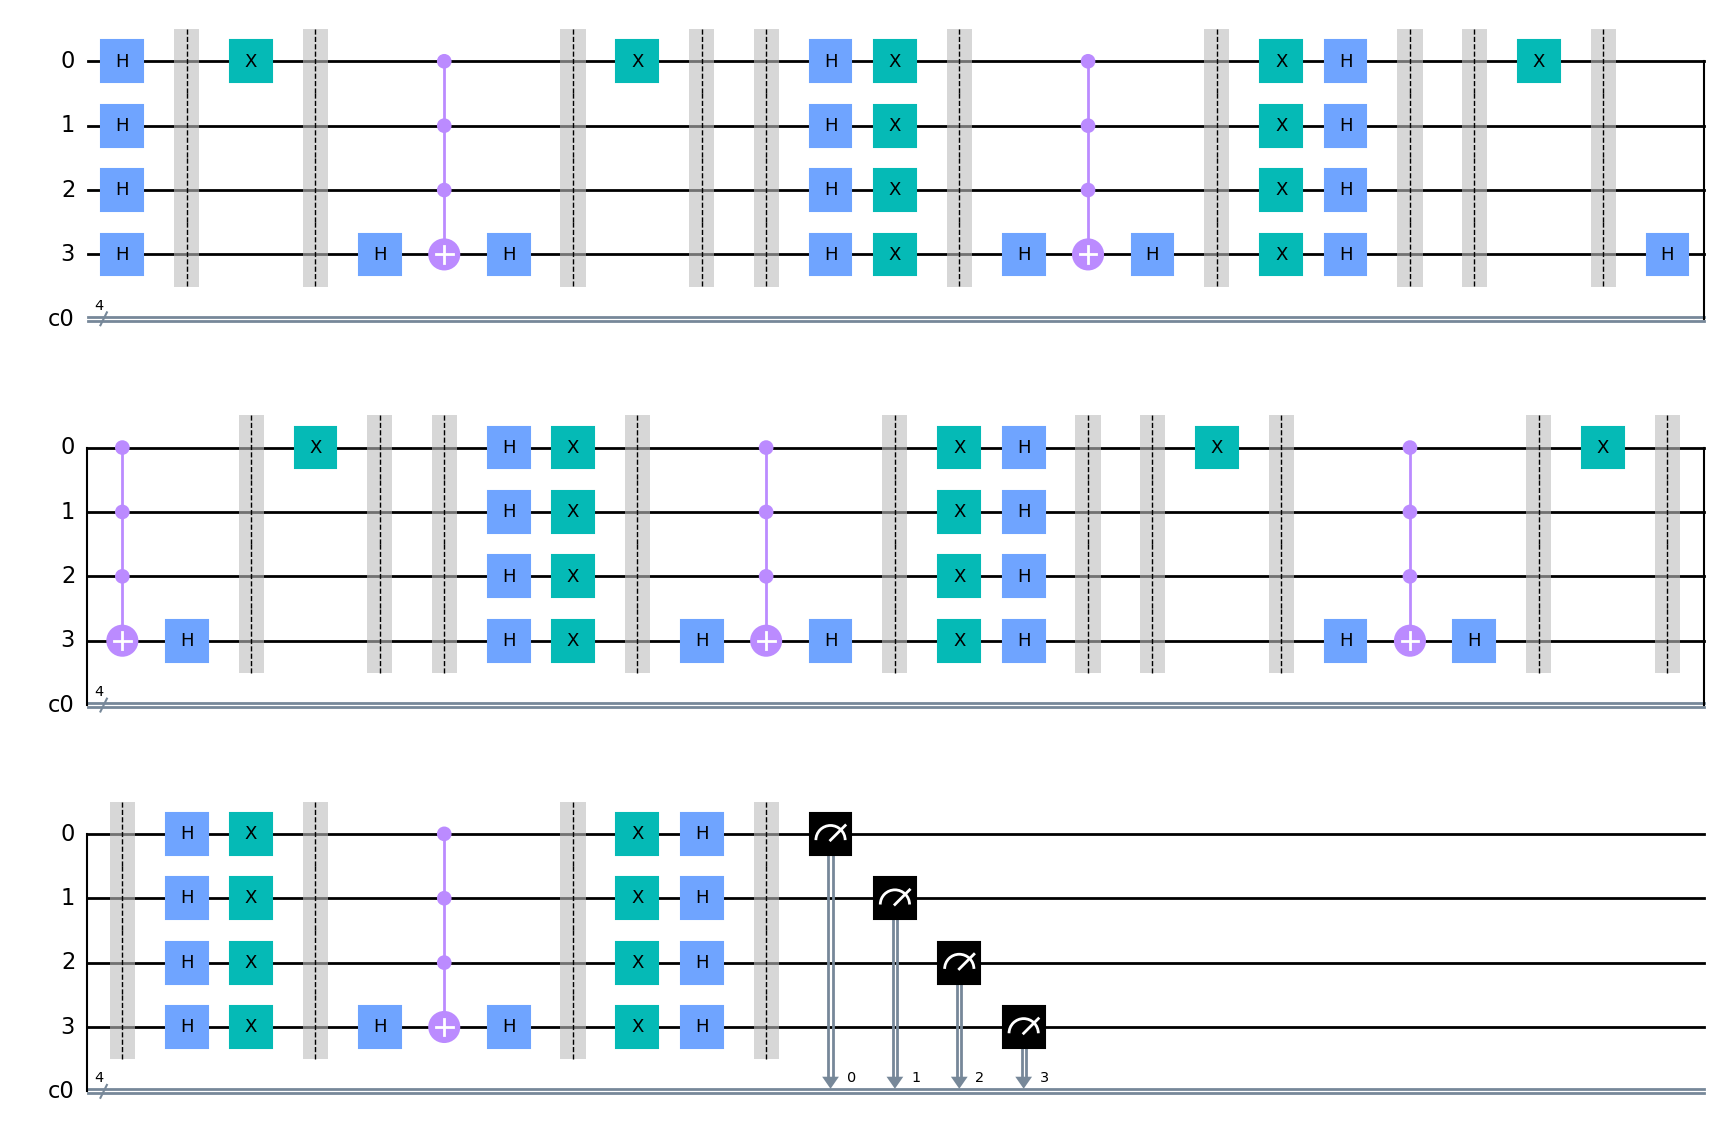

In [5]:
grover_find_value_win_size = find_num()
grover_find_value_win_size.build_iteration(win, block_diagram=block_diagram)
grover_find_value_win_size.create_grover(block_diagram=block_diagram, solutions=len(list(win)))
experiments = grover_find_value_win_size.measure_qc

experiments[0].draw('mpl')

In [6]:
fake_backed_name = 'FakeAuckland' #random.sample(get_fake_backend_list(min_qubit=len(experiments[0].qubits), max_qubit=len(experiments[0].qubits) + 10),1)[0][0]

In [11]:
get_fake_backend_list()

[('FakeBackend5QV2', 5),
 ('FakeSantiagoV2', 5),
 ('FakeMontrealV2', 27),
 ('FakeMumbaiV2', 27),
 ('FakeBrooklynV2', 65),
 ('FakeAuckland', 27),
 ('FakePerth', 7),
 ('FakeGeneva', 27),
 ('FakeMelbourneV2', 15),
 ('FakeRochesterV2', 53),
 ('FakeSingaporeV2', 20),
 ('FakeOslo', 7),
 ('FakeOurenseV2', 5),
 ('FakePrague', 33),
 ('FakeKolkataV2', 27),
 ('FakeBelemV2', 5),
 ('FakeVigoV2', 5),
 ('FakeCambridgeV2', 28),
 ('FakePoughkeepsieV2', 20),
 ('FakeCasablancaV2', 7),
 ('FakeLagosV2', 7),
 ('FakeMumbaiFractionalCX', 27),
 ('FakeParisV2', 27),
 ('FakeCairoV2', 27),
 ('FakeManhattanV2', 65),
 ('FakeBoeblingenV2', 20),
 ('FakeManilaV2', 5),
 ('FakeWashingtonV2', 127),
 ('FakeLondonV2', 5),
 ('FakeSherbrooke', 127),
 ('FakeRomeV2', 5),
 ('FakeJakartaV2', 7),
 ('FakeBogotaV2', 5),
 ('FakeTorontoV2', 27),
 ('FakeJohannesburgV2', 20),
 ('FakeArmonkV2', 0),
 ('FakeBurlingtonV2', 5),
 ('FakeEssexV2', 5),
 ('FakeQuitoV2', 5),
 ('FakeSydneyV2', 27),
 ('FakeAthensV2', 5),
 ('FakeNairobiV2', 7),
 ('F

[[12, 15], [15, 12], [12, 10], [10, 12], [7, 4], [4, 7], [8, 9], [9, 8], [2, 3], [3, 2], [5, 3], [3, 5], [12, 13], [13, 12], [0, 1], [1, 0], [11, 8], [8, 11], [7, 6], [6, 7], [11, 14], [14, 11], [5, 8], [8, 5], [10, 7], [7, 10], [4, 1], [1, 4], [2, 1], [1, 2], [13, 14], [14, 13]]


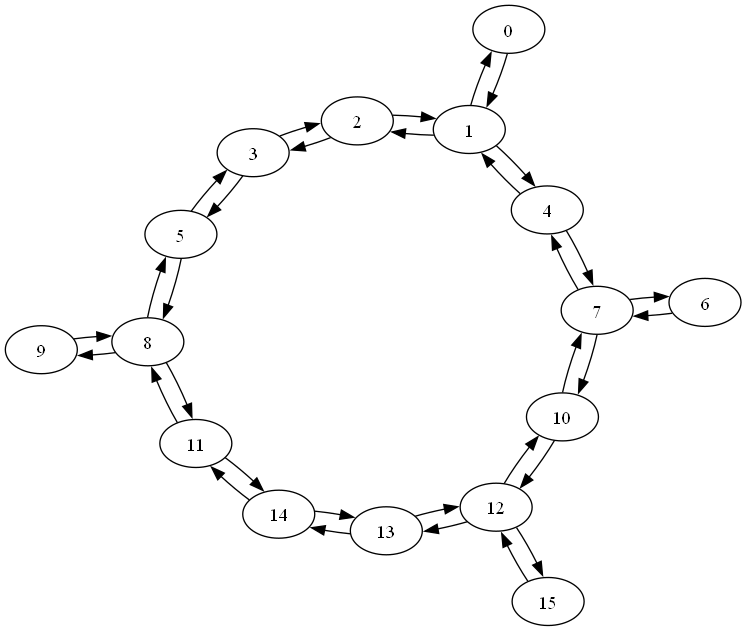

In [21]:
backend = get_fake_backend('FakeGuadalupeV2')
print(backend.coupling_map)
backend.coupling_map.draw()

In [7]:
transpiled_qc_list = get_transpiled_circuits_of_circuit(experiments[0], ['Aer', fake_backed_name], 
                                                   [None, 'Full_Range'],
                                                   optimization_level_list=[0,3])

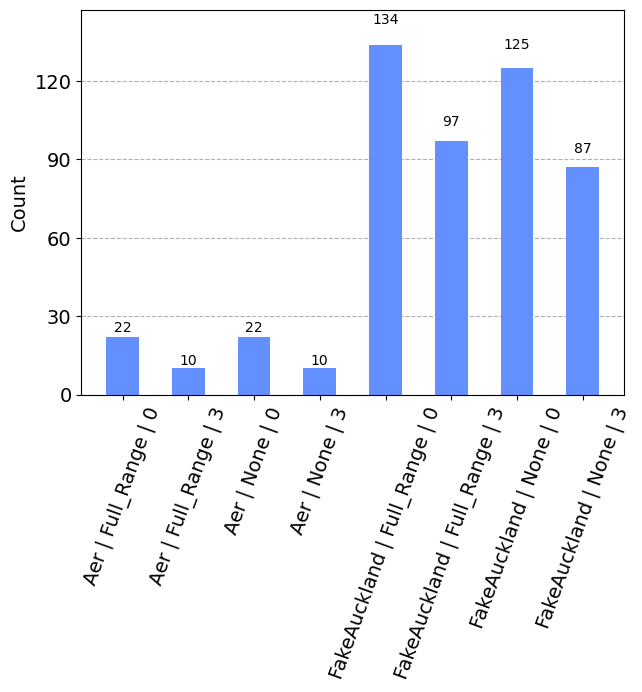

In [8]:
plot_histogram({
    qc.name : qc.depth()
    for qc in transpiled_qc_list
})

c:\Users\User\anaconda3\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


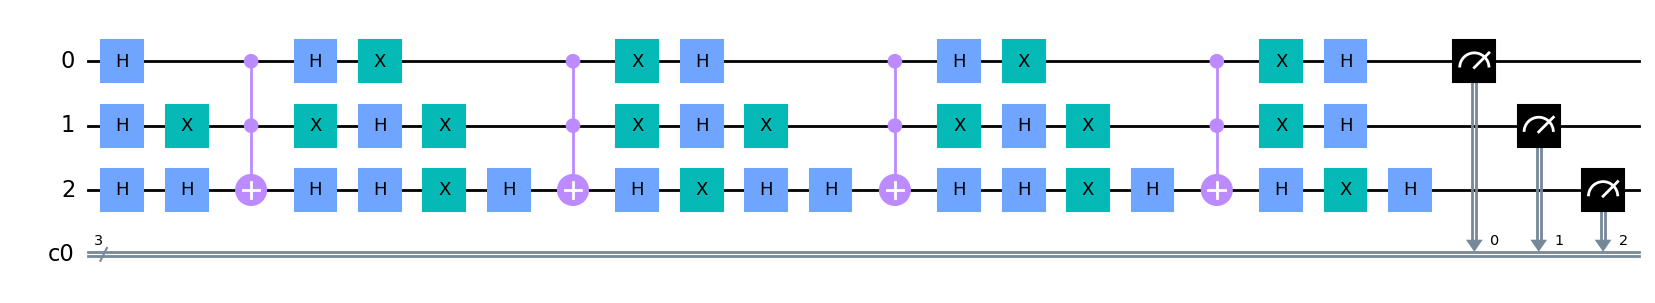

In [9]:
transpiled_qc_list[0].draw('mpl')

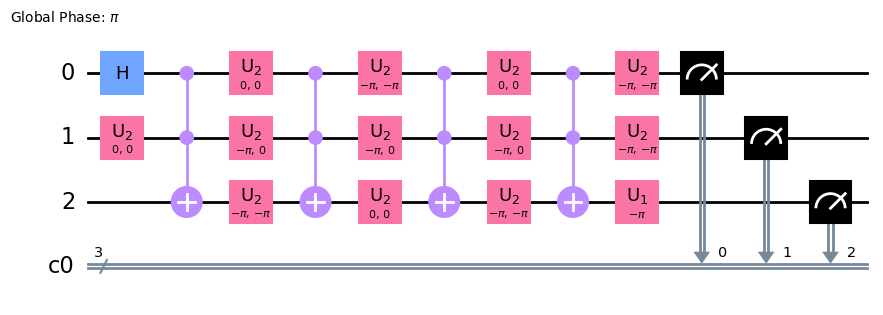

In [10]:
transpiled_qc_list[1].draw('mpl')

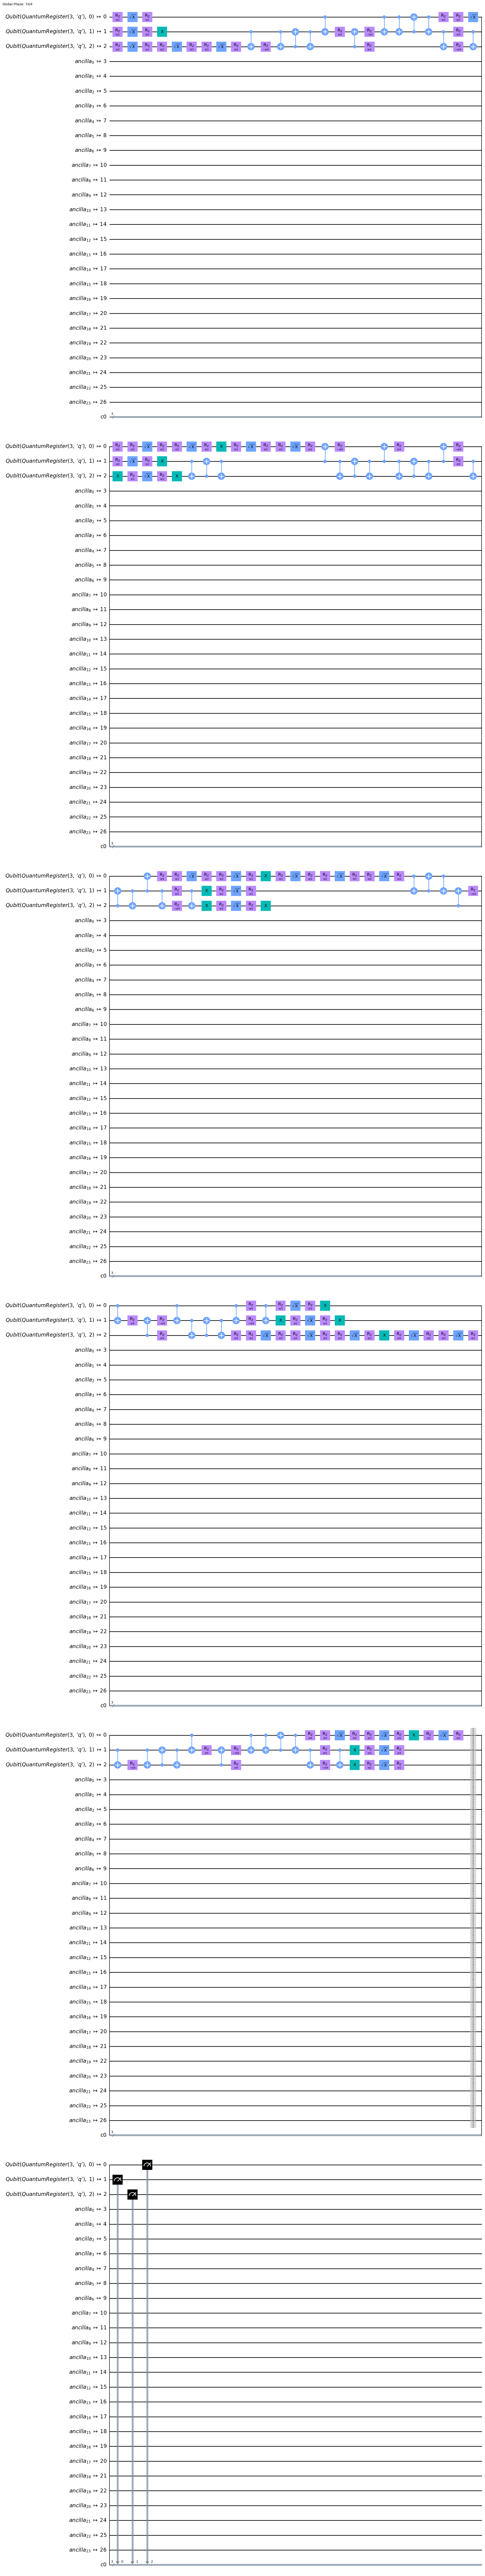

In [11]:
transpiled_qc_list[4].draw('mpl')

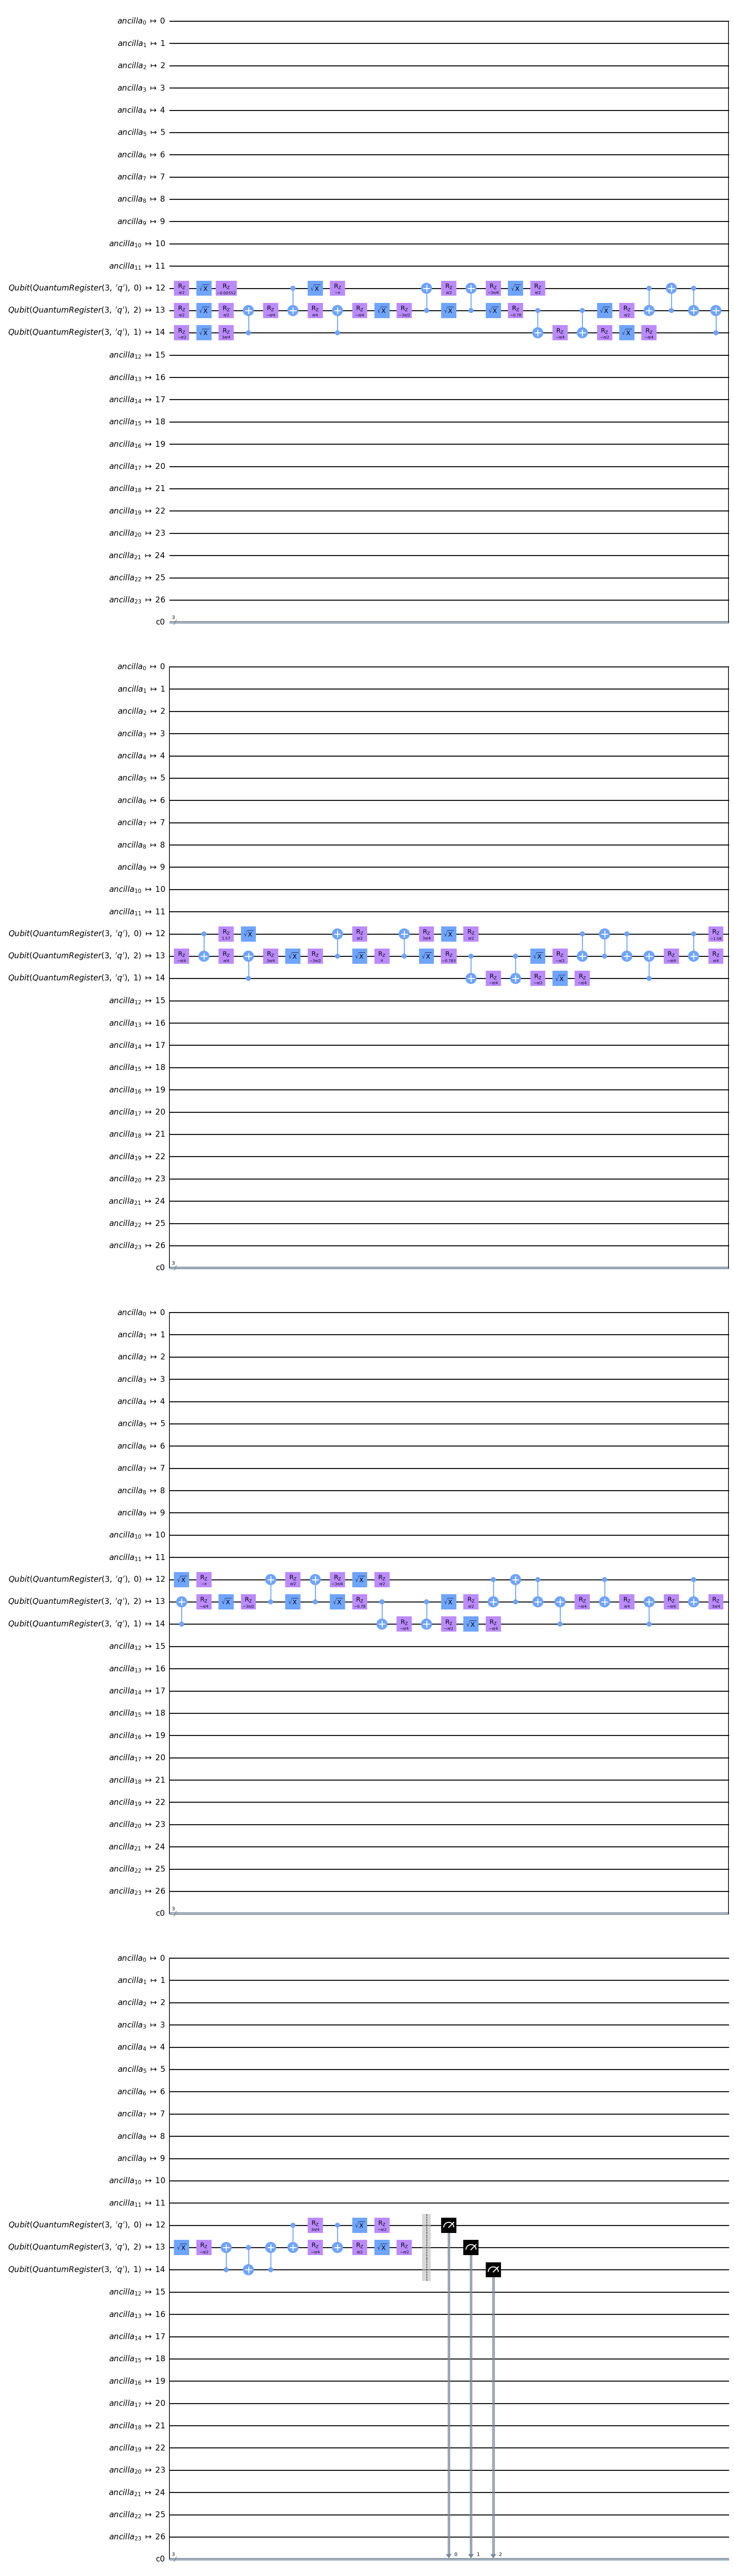

In [12]:
transpiled_qc_list[5].draw('mpl')

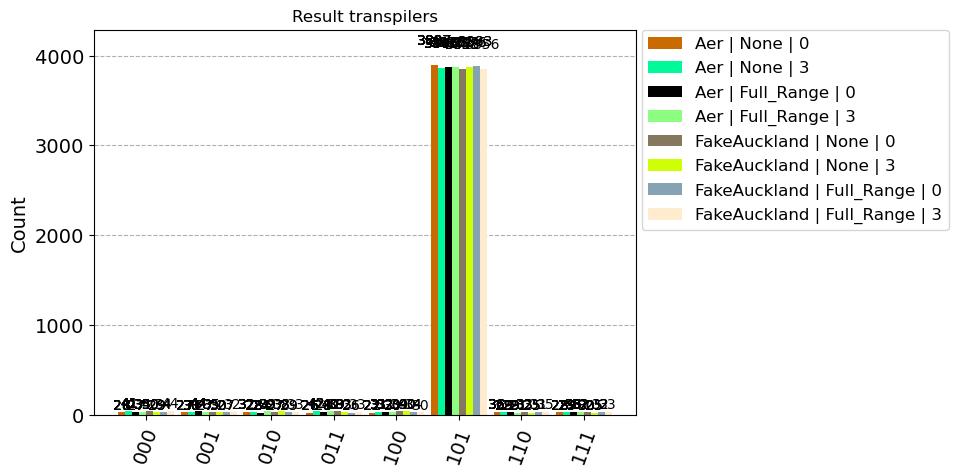

In [13]:
plot_histogram([run_simulator(qc,shots = 1024 * 4).get_counts() for qc in transpiled_qc_list], 
               legend=[qc.name for qc in transpiled_qc_list], color=list(random.choices(list(mcolors.get_named_colors_mapping().values()), k = len(transpiled_qc_list))),
               title="Result transpilers")

In [15]:
num_list_num = 5
data_arr = list(range(num_list_num))
random.shuffle(data_arr)
win = random.sample(data_arr, 1)

print(f"Data array: {data_arr} , the winner: {win}")

Data array: [4, 0, 3, 2, 1] , the winner: [4]


In [16]:
st = timeit.default_timer()
sol = []
for i, val in enumerate(data_arr):
    if val in win:
        sol.append(i)
        
end = timeit.default_timer()
print(f"Time: {end - st} , solution : {sol}")

Time: 0.0002327999973203987 , solution : [0]


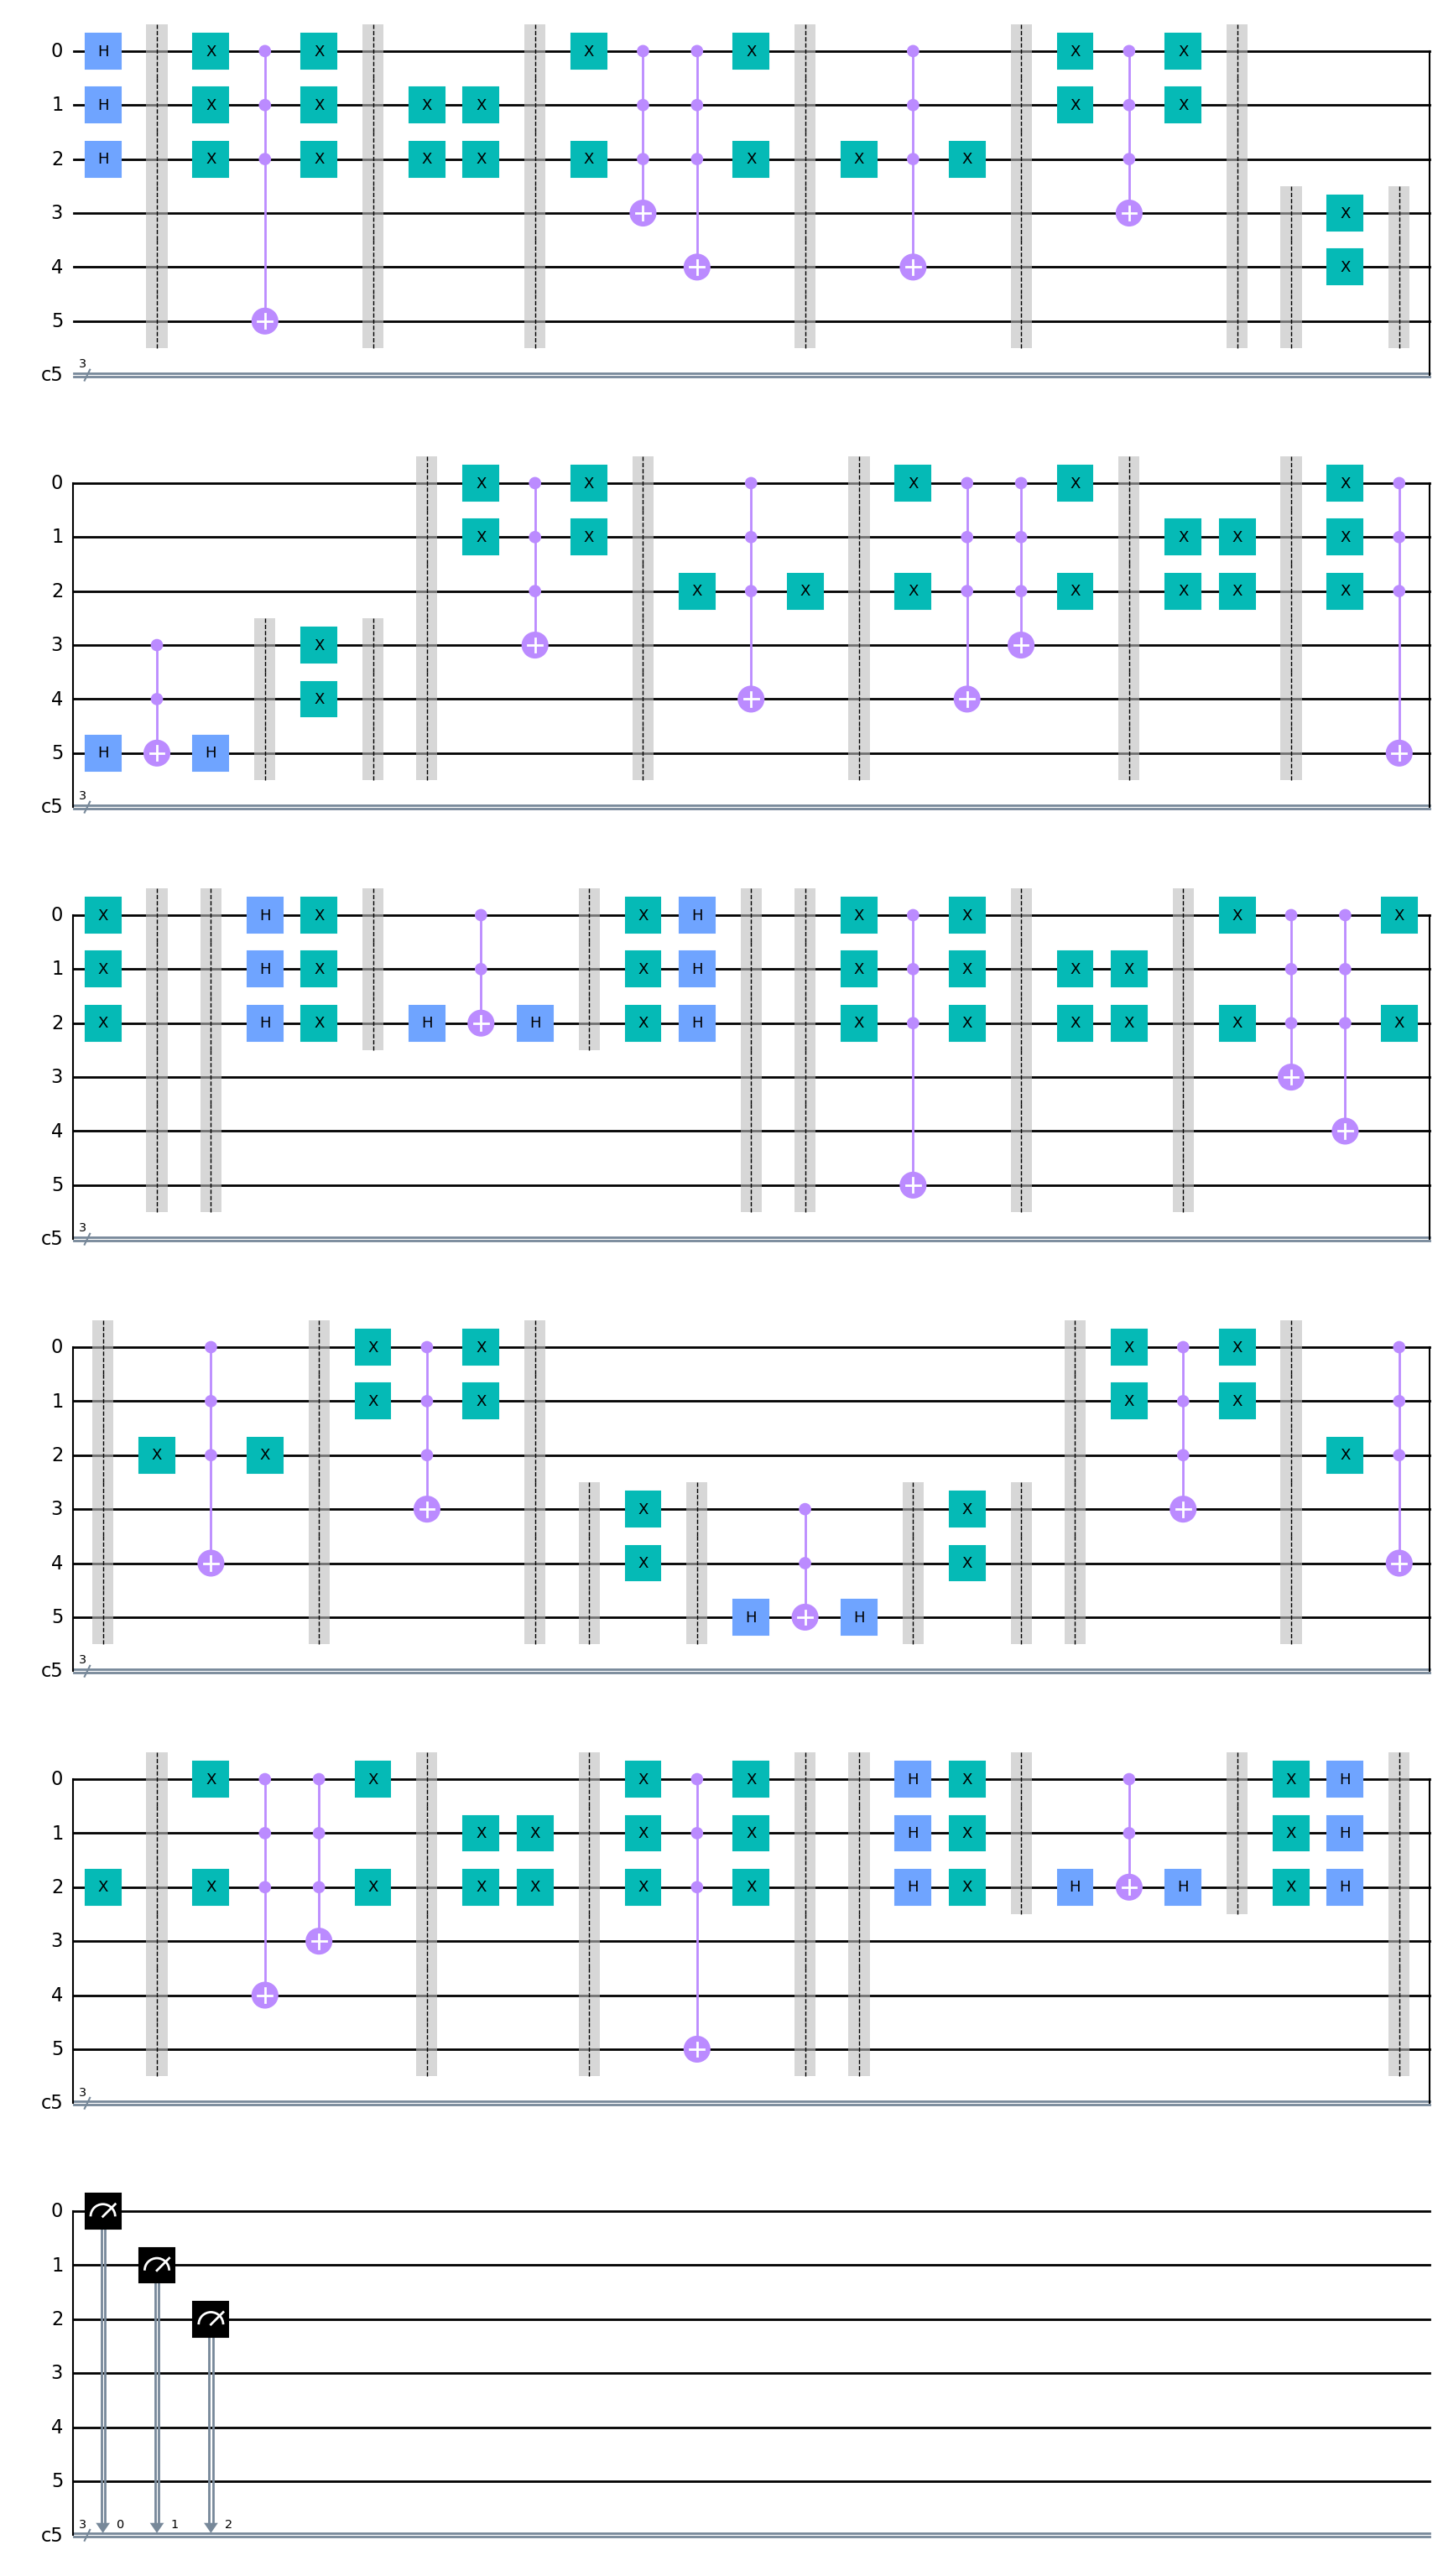

In [42]:
grover_find_value_list = find_num_list()
grover_find_value_list.build_iteration(win, block_diagram=block_diagram, num_array = data_arr)
grover_find_value_list.create_grover(block_diagram=block_diagram, solutions=len(list(win)))
experiments = grover_find_value_list.measure_qc
print(experiments)
experiments[0].draw('mpl')

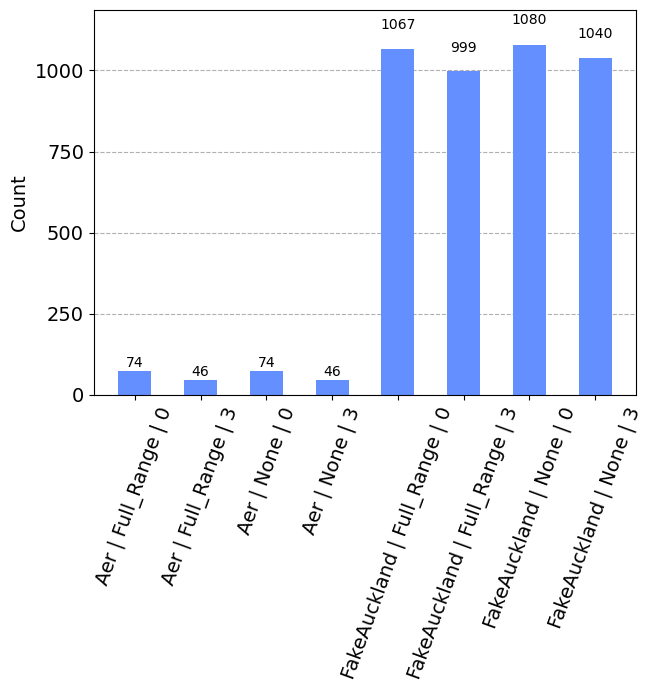

In [43]:
transpiled_qc_list = get_transpiled_circuits_of_circuit(experiments[0], ['Aer', fake_backed_name], 
                                                   [None, 'Full_Range'],
                                                   optimization_level_list=[0,3])
plot_histogram({
    qc.name : qc.depth()
    for qc in transpiled_qc_list
})

In [44]:
qc_result = [run_simulator(qc, shots = 1024 * 4) for qc in transpiled_qc_list]

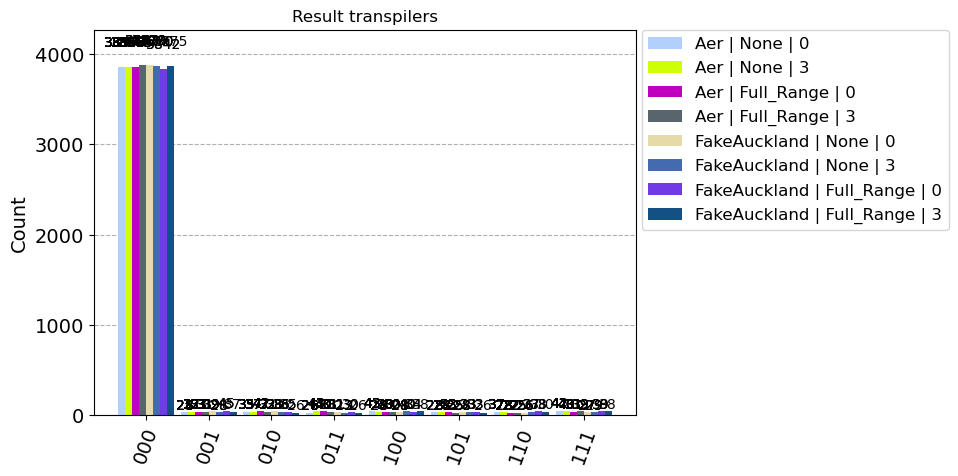

In [45]:
plot_histogram([qc.get_counts() for qc in qc_result], 
               legend=[qc.name for qc in transpiled_qc_list], color=list(random.choices(list(mcolors.get_named_colors_mapping().values()), k = len(transpiled_qc_list))),
               title="Result transpilers")

In [38]:
[{qc.name : result.time_taken} for result, qc in zip(qc_result, transpiled_qc_list)]

[{'Aer | None | 0': 0.01097416877746582},
 {'Aer | None | 3': 0.014957904815673828},
 {'Aer | Full_Range | 0': 0.01296377182006836},
 {'Aer | Full_Range | 3': 0.01097249984741211},
 {'FakeAuckland | None | 0': 0.03290128707885742},
 {'FakeAuckland | None | 3': 0.03590536117553711},
 {'FakeAuckland | Full_Range | 0': 0.03690171241760254},
 {'FakeAuckland | Full_Range | 3': 0.03345656394958496}]

In [39]:
for qc in transpiled_qc_list:
    print(qc.qubits)

[Qubit(QuantumRegister(3, 'index'), 0), Qubit(QuantumRegister(3, 'index'), 1), Qubit(QuantumRegister(3, 'index'), 2), AncillaQubit(AncillaRegister(3, 'data'), 0), AncillaQubit(AncillaRegister(3, 'data'), 1), AncillaQubit(AncillaRegister(3, 'data'), 2)]
[Qubit(QuantumRegister(3, 'index'), 0), Qubit(QuantumRegister(3, 'index'), 1), Qubit(QuantumRegister(3, 'index'), 2), AncillaQubit(AncillaRegister(3, 'data'), 0), AncillaQubit(AncillaRegister(3, 'data'), 1), AncillaQubit(AncillaRegister(3, 'data'), 2)]
[Qubit(QuantumRegister(6, 'q'), 0), Qubit(QuantumRegister(6, 'q'), 1), Qubit(QuantumRegister(6, 'q'), 2), Qubit(QuantumRegister(6, 'q'), 3), Qubit(QuantumRegister(6, 'q'), 4), Qubit(QuantumRegister(6, 'q'), 5)]
[Qubit(QuantumRegister(6, 'q'), 0), Qubit(QuantumRegister(6, 'q'), 1), Qubit(QuantumRegister(6, 'q'), 2), Qubit(QuantumRegister(6, 'q'), 3), Qubit(QuantumRegister(6, 'q'), 4), Qubit(QuantumRegister(6, 'q'), 5)]
[Qubit(QuantumRegister(27, 'q'), 0), Qubit(QuantumRegister(27, 'q'), 1),

c:\Users\User\anaconda3\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


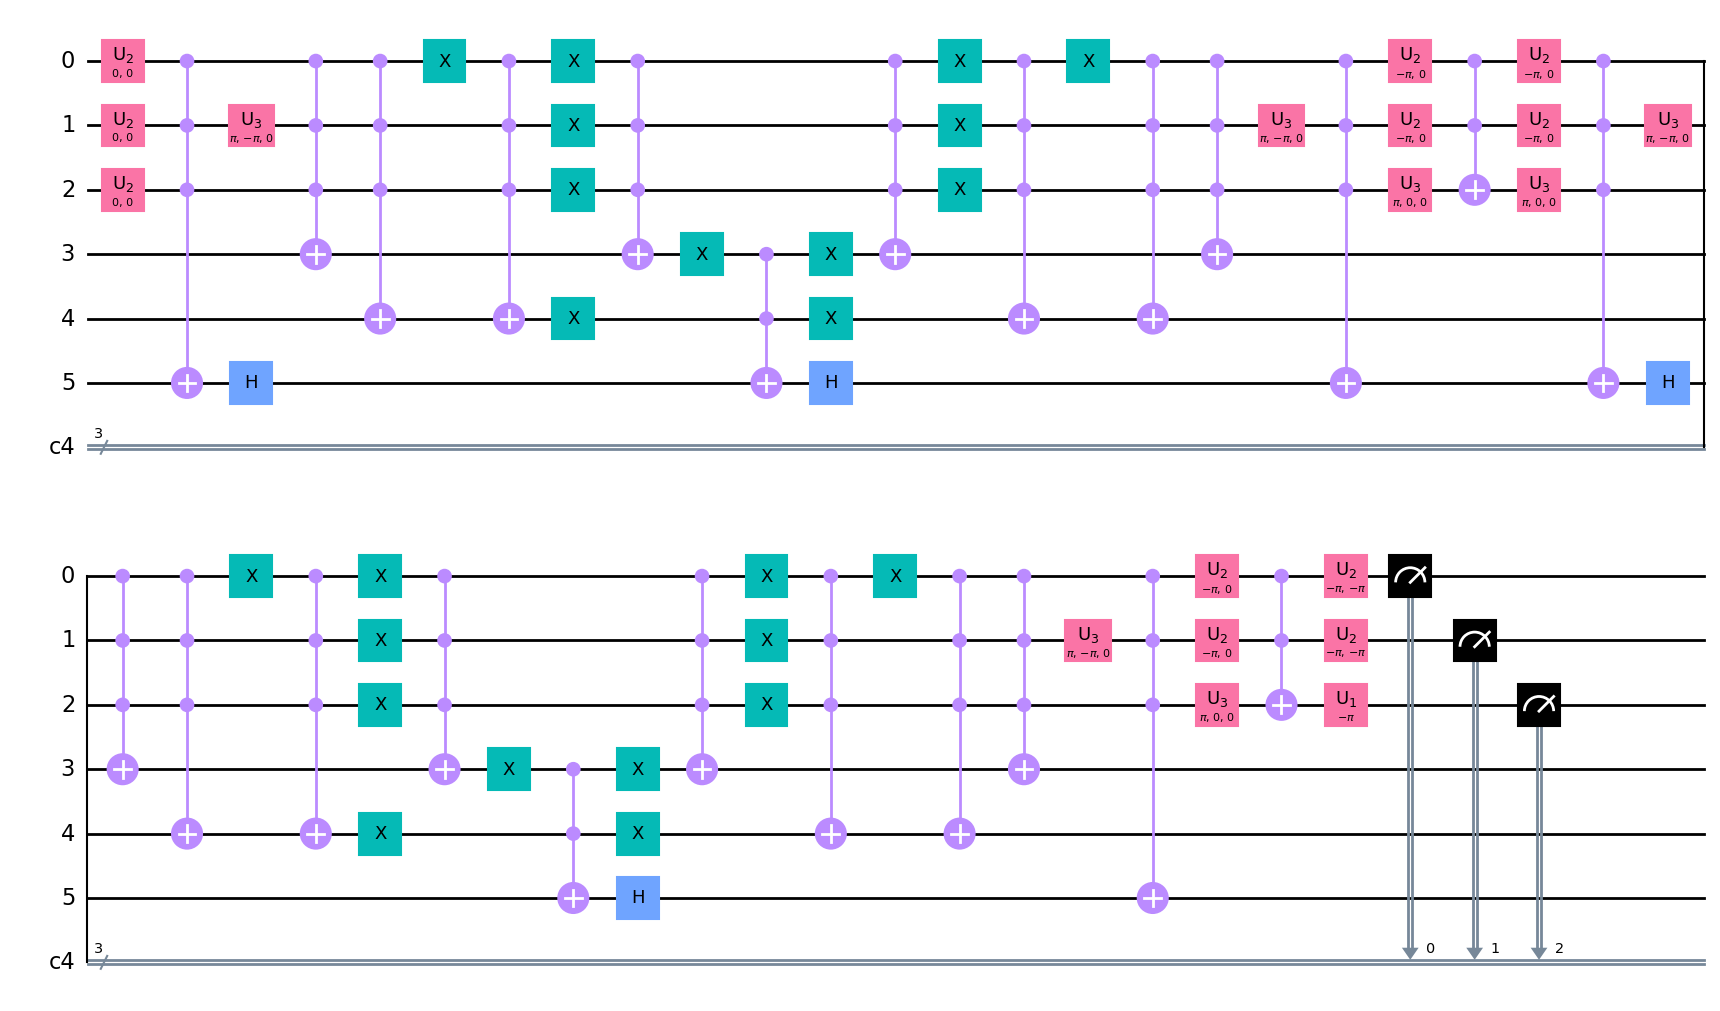

In [40]:
transpiled_qc_list[1].draw('mpl')

In [47]:
transpiled_qc_list[6].draw('mpl')

c:\Users\User\anaconda3\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


ValueError: Image size of 2818x109062 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 2818.09x109062 with 1 Axes>

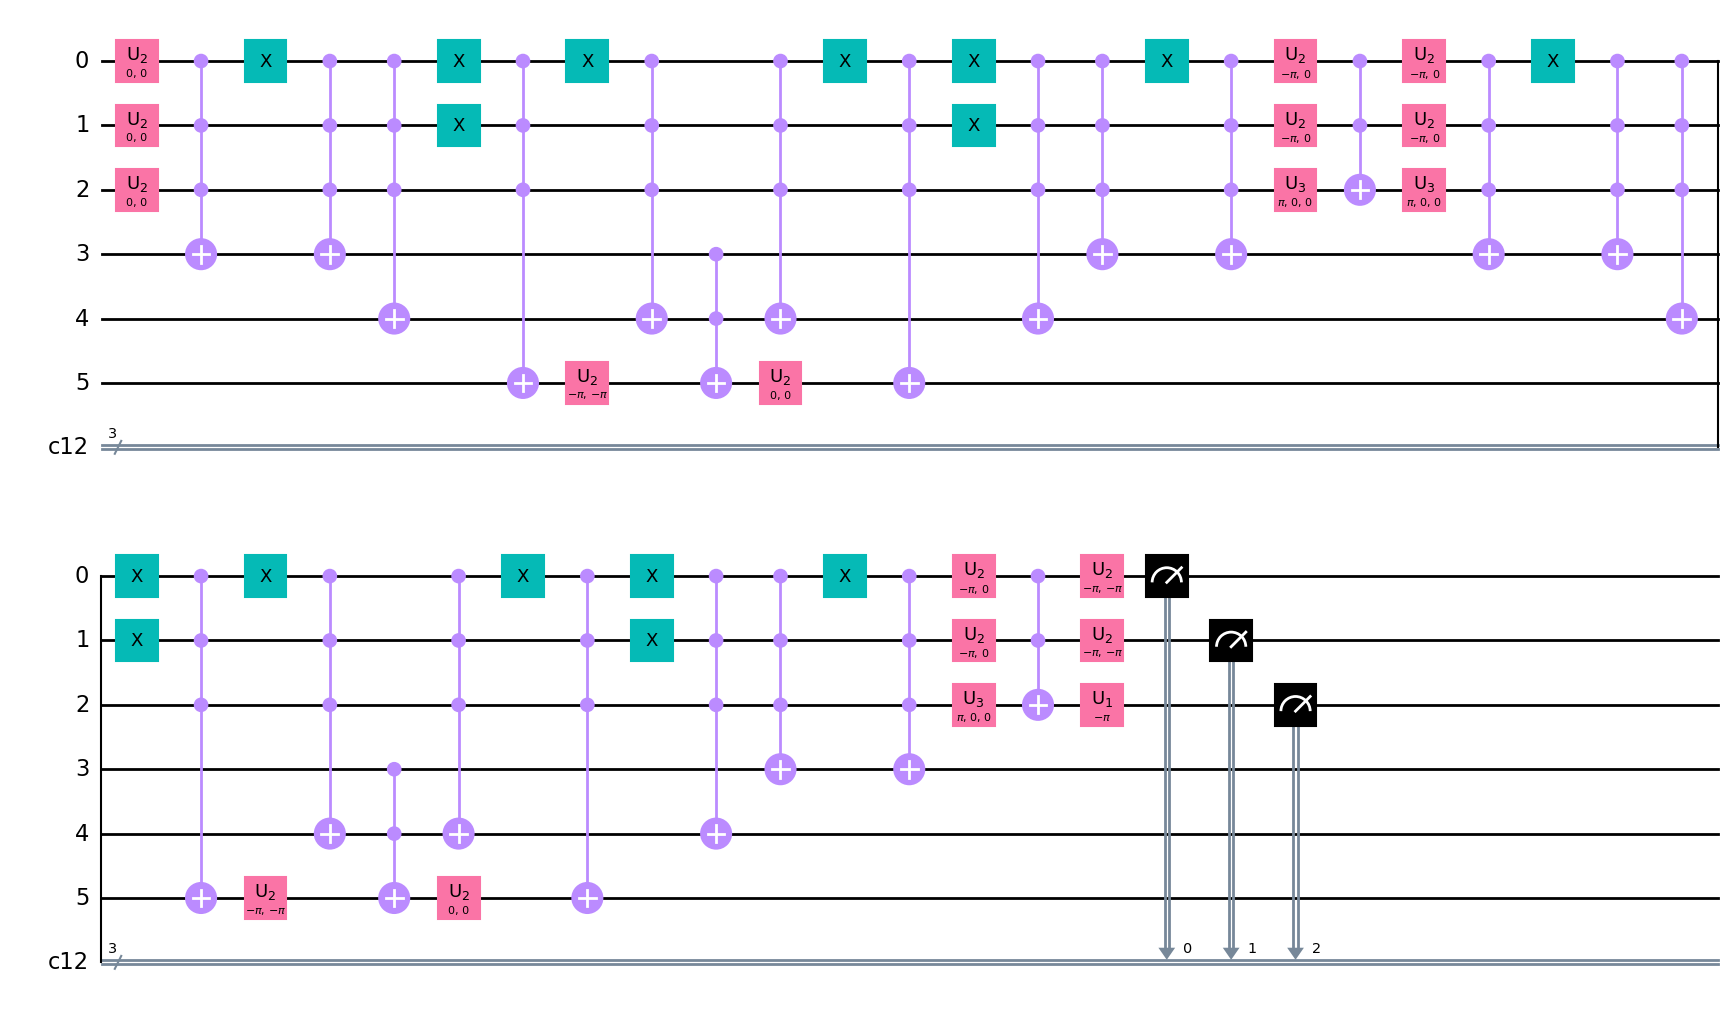

In [ ]:
transpiled_qc_list[1].draw('mpl')

In [51]:
for gate in transpiled_qc_list[1].data:
    print(gate)

CircuitInstruction(operation=Instruction(name='u2', num_qubits=1, num_clbits=0, params=[0.0, 0.0]), qubits=(Qubit(QuantumRegister(3, 'index'), 0),), clbits=())
CircuitInstruction(operation=Instruction(name='u2', num_qubits=1, num_clbits=0, params=[0.0, 0.0]), qubits=(Qubit(QuantumRegister(3, 'index'), 1),), clbits=())
CircuitInstruction(operation=Instruction(name='u2', num_qubits=1, num_clbits=0, params=[0.0, 0.0]), qubits=(Qubit(QuantumRegister(3, 'index'), 2),), clbits=())
CircuitInstruction(operation=Instruction(name='mcx', num_qubits=4, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(3, 'index'), 0), Qubit(QuantumRegister(3, 'index'), 1), Qubit(QuantumRegister(3, 'index'), 2), AncillaQubit(AncillaRegister(3, 'data'), 2)), clbits=())
CircuitInstruction(operation=Instruction(name='u3', num_qubits=1, num_clbits=0, params=[3.141592653589793, -3.141592653589793, 0.0]), qubits=(Qubit(QuantumRegister(3, 'index'), 1),), clbits=())
CircuitInstruction(operation=Instruction(name='mcx'

In [ ]:
transpiled_qc_list[5].draw('mpl')

ValueError: Image size of 2836x101788 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 2836.12x101788 with 1 Axes>